In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import time

import OpenAEM

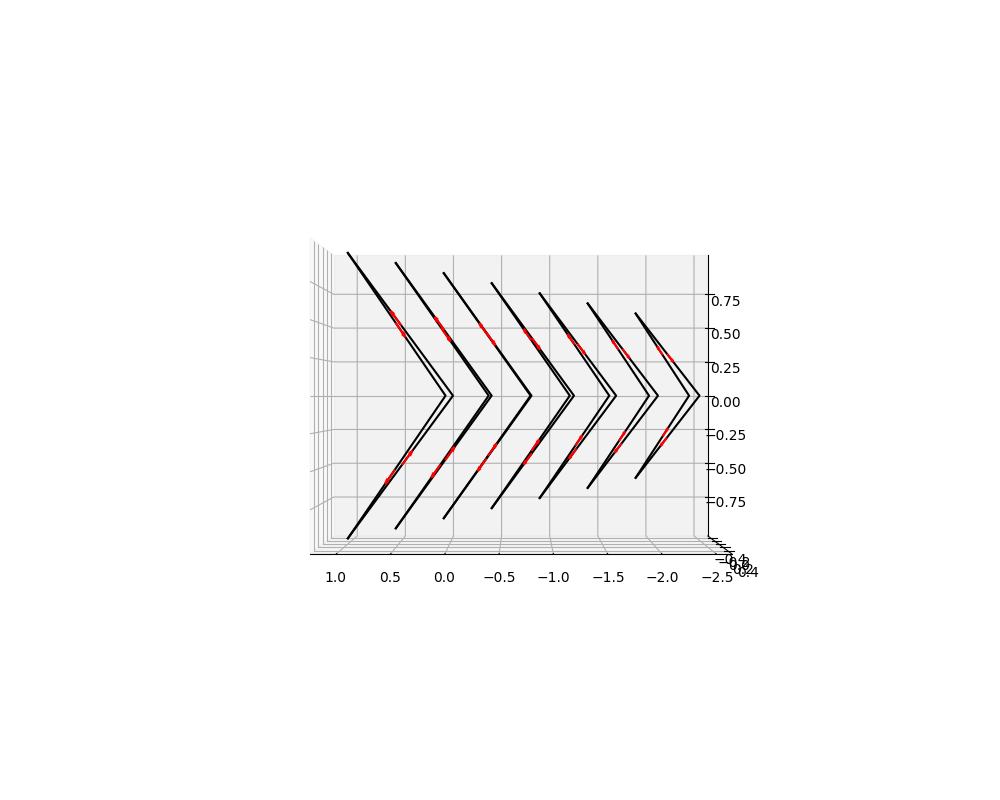

In [2]:
packet = OpenAEM.lambda_packet()
packet_mirror = OpenAEM.mirror_eddy(packet)
attached_eddies = packet + packet_mirror

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
OpenAEM.plot_eddy(attached_eddies, ax)
ax.view_init(0, 90)

In [3]:
rng = np.random.default_rng(seed=1234)

In [4]:
npts = 300
x = rng.uniform(-3, 2, npts)
y = np.zeros(npts)
z = rng.uniform(0, 1.2, npts)
pts = np.array([x, y, z]).T

u = np.zeros(npts)
v = np.zeros(npts)
w = np.zeros(npts)

In [5]:
s_time = time.time()
for i in range(npts):
    for curve in attached_eddies:
        u[i], v[i], w[i] = OpenAEM.biot_savart_eddy(pts[i], attached_eddies)
        
print(f'Elapsed {time.time() - s_time} seconds')

Elapsed 19.457173109054565 seconds


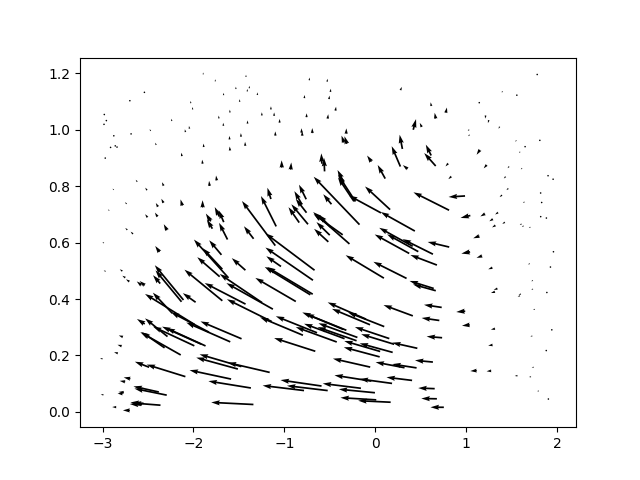

In [6]:
plt.figure()
plt.quiver(x, z, u, w)